# 导入数据

In [1]:
import pandas as pd

# 数据加载
dataset = pd.read_csv('./SupplyChain.csv',encoding = 'unicode_escape')
dataset

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


* 不写encoding，报错：

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfa in position 2: invalid start byte

In [2]:
# 将18万用户 划分为8个层次（通过 RFM）
dataset['Customer Id'].value_counts()

5654     47
10591    45
5004     45
9371     44
3708     44
         ..
19161     1
17940     1
15771     1
13722     1
16720     1
Name: Customer Id, Length: 20652, dtype: int64

In [3]:
# 180519 笔订单，53个特征
dataset.shape # (180519, 53)

(180519, 53)

In [4]:
# 查看存在空值的字段
temp = dataset.isnull().sum() 
temp[temp>0].index

Index(['Customer Lname', 'Customer Zipcode', 'Order Zipcode',
       'Product Description'],
      dtype='object')

# EDA

In [6]:
data.select_dtypes(exclude = 'object').head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
0,3,4,91.250000,314.640015,0,73,20755,725.0,2,18.251453,...,1,327.75,314.640015,91.250000,NaN,1360,73,NaN,327.75,0
1,5,4,-249.089996,311.359985,1,73,19492,725.0,2,18.279451,...,1,327.75,311.359985,-249.089996,NaN,1360,73,NaN,327.75,0
2,4,4,-247.779999,309.720001,0,73,19491,95125.0,2,37.292233,...,1,327.75,309.720001,-247.779999,NaN,1360,73,NaN,327.75,0
3,3,4,22.860001,304.809998,0,73,19490,90027.0,2,34.125946,...,1,327.75,304.809998,22.860001,NaN,1360,73,NaN,327.75,0
4,2,4,134.210007,298.250000,0,73,19489,725.0,2,18.253769,...,1,327.75,298.250000,134.210007,NaN,1360,73,NaN,327.75,0


In [7]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

## 客人名字

In [9]:
# 将 FirstName 与Last Name 进行合并 => Full Name

dataset['Customer Full Name'] = dataset['Customer Fname'] + dataset['Customer Lname']
dataset[['Customer Full Name','Customer Fname','Customer Lname']]

,Customer Full Name,Customer Fname,Customer Lname
0,CallyHolloway,Cally,Holloway
1,IreneLuna,Irene,Luna
2,GillianMaldonado,Gillian,Maldonado
3,TanaTate,Tana,Tate
4,OrliHendricks,Orli,Hendricks
...,...,...,...
180514,MariaPeterson,Maria,Peterson
180515,RonaldClark,Ronald,Clark
180516,JohnSmith,John,Smith
180517,MarySmith,Mary,Smith


In [10]:
dataset['Customer Full Name'].value_counts()

MarySmith       23884
RobertSmith       744
JamesSmith        726
DavidSmith        723
JohnSmith         645
                ...  
WynterMurray        1
LeighMoses          1
IndiaLester         1
NadineBoyle         1
EmmaHinton          1
Name: Customer Full Name, Length: 14025, dtype: int64

<AxesSubplot:>

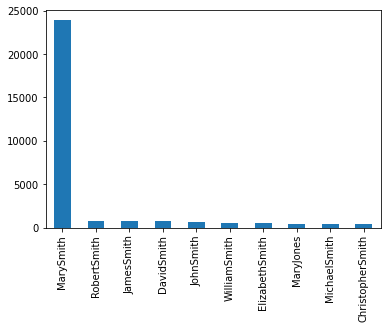

In [29]:
# 取数值最大的Top10进行条形图展示
dataset['Customer Full Name'].value_counts().nlargest(10).plot.bar()

In [13]:
dataset['Customer Zipcode'].value_counts()
# dataset['Customer Zipcode'].isnull().sum()  # 3
dataset['Customer Zipcode'].fillna(dataset['Customer Zipcode'].mode()[0],inplace = True)
dataset['Customer Zipcode'].isnull().sum()

0

## 对于销售额进行探索（对应 Sales per customer）

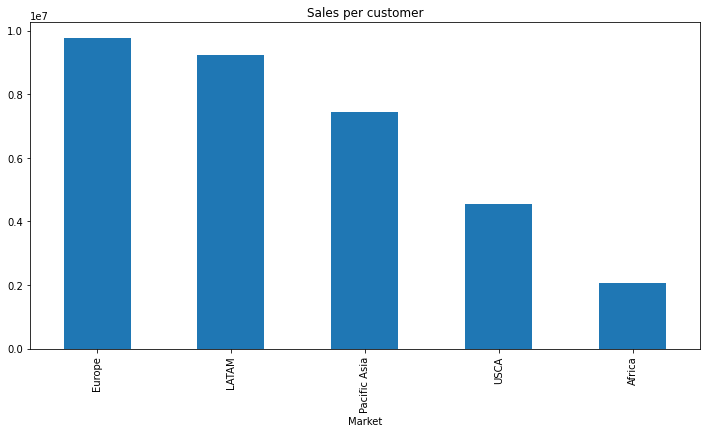

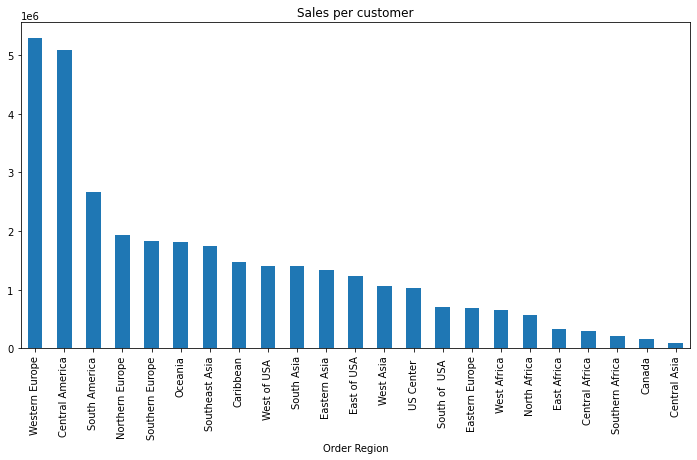

In [20]:
data[['Sales per customer','Market']]
# 按照不同的Market, Order Region
mkt = data.groupby('Market')
mkt['Sales per customer'].sum().sort_values(ascending = False).\
                        plot.bar(figsize = (12,6),title = 'Sales per customer')

plt.show()

# 按照不同的Category Name
region = data.groupby('Order Region')
region['Sales per customer'].sum().sort_values(ascending = False).\
                        plot.bar(figsize = (12,6),title = 'Sales per customer')

plt.show()

## 按照不同的时间维度（年，月，星期，小时）的趋势

In [21]:
temp = pd.DatetimeIndex(data['order date (DateOrders)'])
temp

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00',
               '2018-01-13 12:06:00', '2018-01-13 11:45:00',
               '2018-01-13 11:24:00', '2018-01-13 11:03:00',
               '2018-01-13 10:42:00', '2018-01-13 10:21:00',
               '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00',
               '2016-01-16 06:28:00', '2016-01-16 06:07:00',
               '2016-01-16 05:04:00', '2016-01-16 03:40:00',
               '2016-01-16 01:34:00', '2016-01-15 21:00:00',
               '2016-01-15 20:18:00', '2016-01-15 18:54:00'],
              dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

In [22]:
# 取order date (DateOrders)字段中的year,month,weekday,hour
data['order_year'] = temp.year
data['order_month'] = temp.month
data['order_week_day'] = temp.weekday
data['order_hour'] = temp.hour
data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class,CallyHolloway,2018,1,2,22
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class,IreneLuna,2018,1,5,12
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class,GillianMaldonado,2018,1,5,12
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class,TanaTate,2018,1,5,11
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class,OrliHendricks,2018,1,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class,MariaPeterson,2016,1,5,3
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class,RonaldClark,2016,1,5,1
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class,JohnSmith,2016,1,4,21
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class,MarySmith,2016,1,4,20


<AxesSubplot:title={'center':'Mean Sales in Hour'}, xlabel='order_hour'>

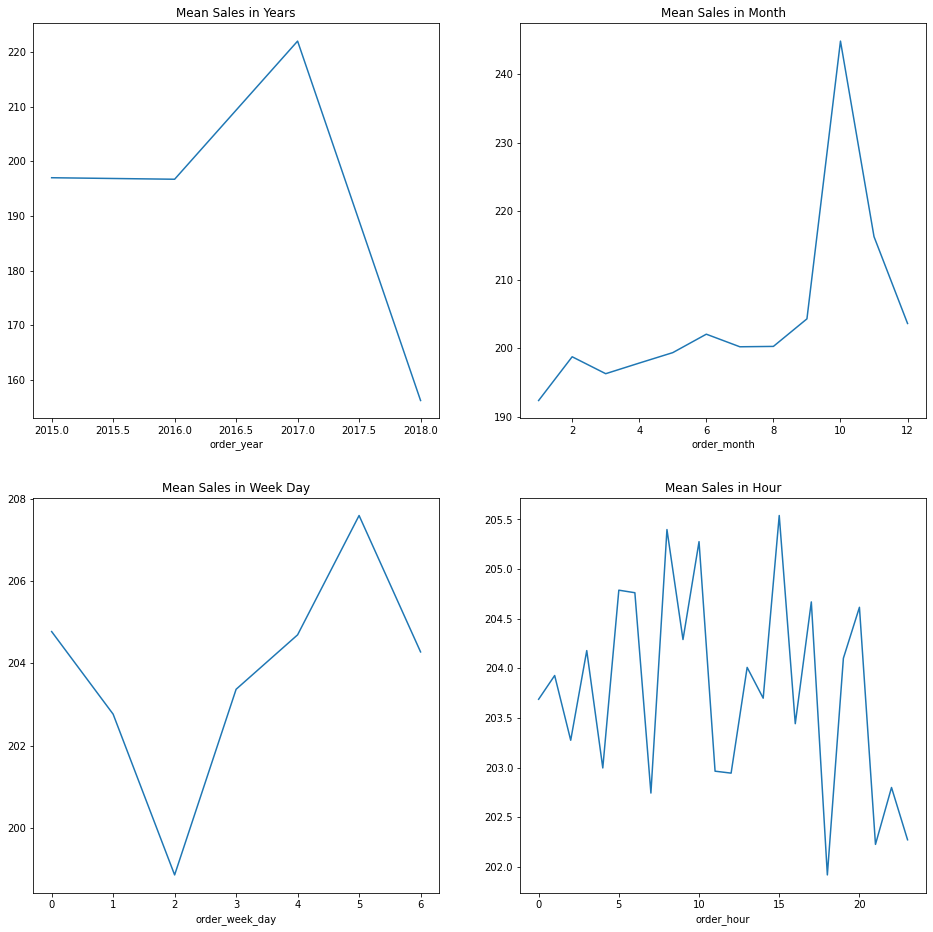

In [23]:
# 对销售额进行探索，按照不同时间尺度order_year
plt.figure(figsize = (16,16))
plt.subplot(2,2,1)   # 多个子图：其中第三个参数表示子图的索引号
df_year = data.groupby('order_year')
df_year['Sales'].mean().plot(title = 'Mean Sales in Years')

plt.subplot(2,2,2)
df_year = data.groupby('order_month')
df_year['Sales'].mean().plot(title = 'Mean Sales in Month')

plt.subplot(2,2,3)
df_year = data.groupby('order_week_day')
df_year['Sales'].mean().plot(title = 'Mean Sales in Week Day')

plt.subplot(2,2,4)
df_year = data.groupby('order_hour')
df_year['Sales'].mean().plot(title = 'Mean Sales in Hour')

## Product Price 与 Sales per customer 相关性

<AxesSubplot:xlabel='Product Price'>

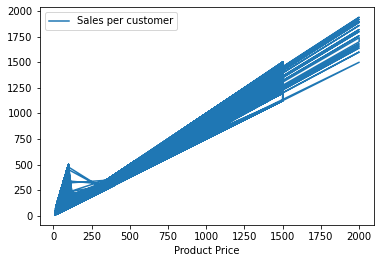

In [25]:
# 探索商品价格与销售额之间的关系
data.plot(x = 'Product Price',y = 'Sales per customer')

# 用户分层RFM

In [26]:
# 时间类型转换
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
# 统计最后一笔订单的时间
data['order date (DateOrders)'].max()

Timestamp('2018-01-31 23:38:00')

In [27]:
# 假设当前时间为2018-2-1
import datetime
now = datetime.datetime(2018,2,1)
now

datetime.datetime(2018, 2, 1, 0, 0)

## 计算每个用户的RFM 指标

In [30]:
customer_seg = data.groupby('Customer Id').agg({'order date (DateOrders)':lambda x :(now-x.max()).days,\
                             'Order Id': lambda x:len(x),'Sales':lambda x :x.sum()})
customer_seg 

,order date (DateOrders),Order Id,Sales
Customer Id,,,
1,792,1,499.950012
2,136,10,1819.730034
3,229,18,3537.680094
4,380,14,1719.630030
5,457,7,1274.750023
...,...,...,...
20753,0,1,215.820007
20754,0,1,215.820007
20755,0,1,327.750000


In [31]:
customer_seg.rename(columns = {'order date (DateOrders)':'R_value',\
                              'Order Id':'F_value',\
                              'Sales':'M_value'},inplace = True)
customer_seg

,R_value,F_value,M_value
Customer Id,,,
1,792,1,499.950012
2,136,10,1819.730034
3,229,18,3537.680094
4,380,14,1719.630030
5,457,7,1274.750023
...,...,...,...
20753,0,1,215.820007
20754,0,1,215.820007
20755,0,1,327.750000


## 将RFM 数据划分为2个尺度

In [32]:
# 计算各指标的平均值
quantiles = customer_seg.quantile(q=[0.5])
quantiles.to_dict()

{'R_value': {0.5: 159.0},
 'F_value': {0.5: 7.0},
 'M_value': {0.5: 1499.82503324}}

In [33]:
# R_value 越小越好 => R_score 就越大
def R_Score(x,b,c):
    if x< c[b][0.5]:
        return 2
    else:
        return 1
    
# FM_value 越大越好 => R_score 就越大
def FM_Score(x,b,c):
    if x< c[b][0.5]:
        return 1
    else:
        return 2

In [34]:
# 创建R_Score ,用于将R_value => [1,2]
customer_seg['R_Score'] = customer_seg['R_value'].apply(R_Score,args = ('R_value',quantiles))
# 创建F_Score ,用于将R_value => [1,2]
customer_seg['F_Score'] = customer_seg['F_value'].apply(FM_Score,args = ('F_value',quantiles))
# 创建M_Score ,用于将R_value => [1,2]
customer_seg['M_Score'] = customer_seg['M_value'].apply(FM_Score,args = ('M_value',quantiles))


customer_seg

,R_value,F_value,M_value,R_Score,F_Score,M_Score
Customer Id,,,,,,
1,792,1,499.950012,1,1,1
2,136,10,1819.730034,2,2,2
3,229,18,3537.680094,1,2,2
4,380,14,1719.630030,1,2,2
5,457,7,1274.750023,1,2,1
...,...,...,...,...,...,...
20753,0,1,215.820007,2,1,1
20754,0,1,215.820007,2,1,1
20755,0,1,327.750000,2,1,1


## 基于各指标的划分尺度、计算RFM 用户分层

In [35]:

def RFM_user(df):
    if df['M_Score'] == 2 and df['F_Score']  == 2 and df['R_Score'] == 2:
        return '重要价值用户'
    if df['M_Score'] == 2 and df['F_Score']  == 1 and df['R_Score'] == 2:
        return '重要发展用户'
    if df['M_Score'] == 2 and df['F_Score']  == 2 and df['R_Score'] == 1:
        return '重要保持用户'
    if df['M_Score'] == 2 and df['F_Score']  == 1 and df['R_Score'] == 1:
        return '重要挽留用户'
    if df['M_Score'] == 1 and df['F_Score']  == 2 and df['R_Score'] == 2:
        return '一般价值用户'
    if df['M_Score'] == 1 and df['F_Score']  == 1 and df['R_Score'] == 2:
        return '一般发展用户'
    if df['M_Score'] == 1 and df['F_Score']  == 2 and df['R_Score'] == 1:
        return '一般保持用户'
    if df['M_Score'] == 1 and df['F_Score']  == 1 and df['R_Score'] == 1:
        return '一般挽留用户'

In [36]:
customer_seg['Customer_Type'] = customer_seg.apply(RFM_user,axis = 1)
customer_seg

,R_value,F_value,M_value,R_Score,F_Score,M_Score,Customer_Type
Customer Id,,,,,,,
1,792,1,499.950012,1,1,1,一般挽留用户
2,136,10,1819.730034,2,2,2,重要价值用户
3,229,18,3537.680094,1,2,2,重要保持用户
4,380,14,1719.630030,1,2,2,重要保持用户
5,457,7,1274.750023,1,2,1,一般保持用户
...,...,...,...,...,...,...,...
20753,0,1,215.820007,2,1,1,一般发展用户
20754,0,1,215.820007,2,1,1,一般发展用户
20755,0,1,327.750000,2,1,1,一般发展用户


# 预测

## 对于欺诈订单进行预测，即Order Status='SUSPECTED_FRAUD'

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 58 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  